In [14]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Задание 1

Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [5]:
water_df = pd.read_csv('water.csv', usecols=['location','town','mortality','hardness'])
water_df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


# Задание 2

Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [238]:
def regression(df):
    df.plot(kind='scatter', x='hardness', y='mortality', title='Точечный график зависимости смертности от жёсткости воды')
    plt.show()
    print(f'Коэффициент корреляции Пирсона: ', df.corr().loc['hardness', 'mortality'])
    print(f'Коэффициент корреляции Спирмена: ', df.corr(method='spearman').loc['hardness', 'mortality'])
    x = df[['hardness']]
    y = df['mortality']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
    model = LinearRegression()
    model.fit(x_train, y_train)
    print(f'Коэффициент детерминации: ', model.score(x_test, y_test))
    sns.regplot(x=x_test, y=y_test).set_title('График измеренных тестовых и предсказанных значений смертности в зависимости от жёсткости воды')
    plt.show()
    sns.residplot(x=x_test, y=y_test, lowess=True, color="g").set_title('График остатков между измеренными и предсказанными значениями смертности')

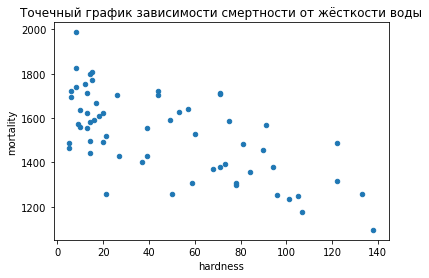

Коэффициент корреляции Пирсона:  -0.6548486232042464
Коэффициент корреляции Спирмена:  -0.6316646189166502
Коэффициент детерминации:  0.5305131271695874


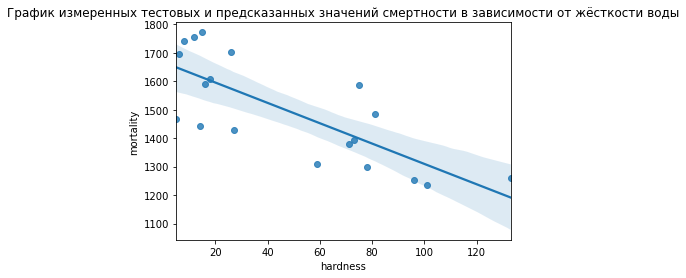

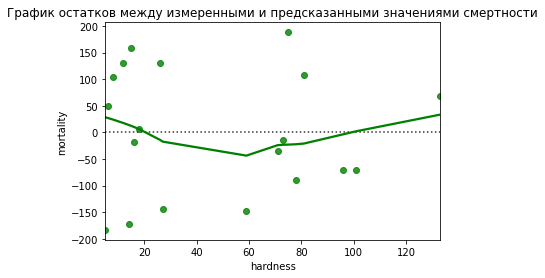

In [239]:
regression(water_df)

# Задание 3

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [240]:
north_df = water_df.loc[df['location'] == 'North']
south_df = water_df.loc[df['location'] == 'South']

In [241]:
north_df.describe()

,mortality,hardness
count,35.000000,35.000000
mean,1633.600000,30.400000
std,136.936911,26.134494
min,1378.000000,6.000000
25%,1557.500000,12.500000
50%,1637.000000,17.000000
75%,1718.000000,44.000000
max,1987.000000,94.000000


In [242]:
south_df.describe()

,mortality,hardness
count,26.000000,26.000000
mean,1376.807692,69.769231
std,140.269175,40.360682
min,1096.000000,5.000000
25%,1259.250000,40.250000
50%,1364.000000,75.500000
75%,1485.750000,99.750000
max,1627.000000,138.000000


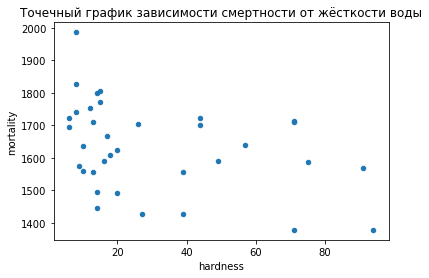

Коэффициент корреляции Пирсона:  -0.36859783832887183
Коэффициент корреляции Спирмена:  -0.4042078956511175
Коэффициент детерминации:  -0.0027967328921720824


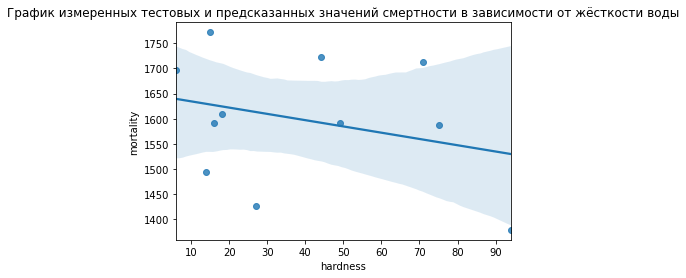

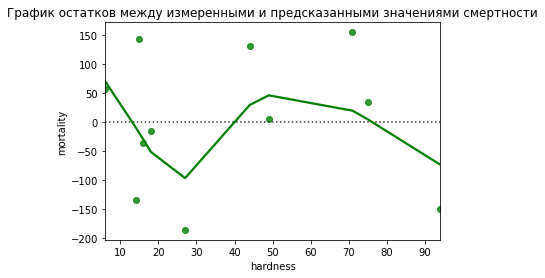

In [243]:
regression(north_df)

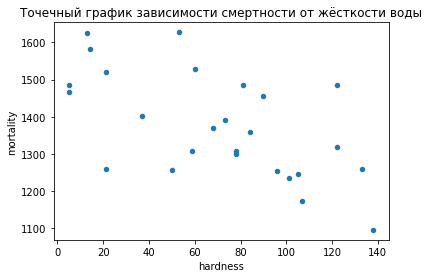

Коэффициент корреляции Пирсона:  -0.6021532715484159
Коэффициент корреляции Спирмена:  -0.5957229185013566
Коэффициент детерминации:  0.1474538393955951


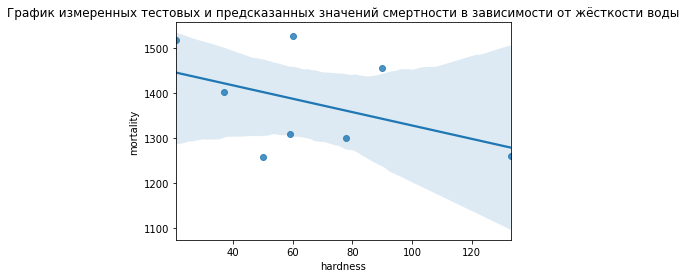

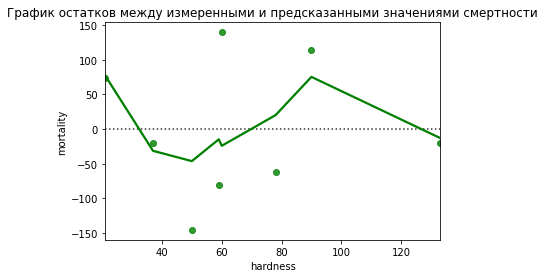

In [219]:
regression(south_df)

Вывод: фактор расположения города на севере или на юге имеет определённое влияние на смертность в зависимости от жёсткости воды. Внутри северных и южных городов корреляция между значениями жёсткости воды и смертности отсутствует. Жёсткость воды на севере и юге существенно отличаются. Базовые статистики свидетельствуют об обратной зависимости: чем выше жёсткость воды, тем ниже смертность, что отчётливо проявляется на различиях между северными и южными городами. 